## AdaBoosting, Gradientboosting, XGBoosting Regressor PostClass

### Bagging :
- Random Forest Bagging metodunu kullanır.
- Bagging'de her model bağımsız ve paralel olarak çalışır.
- Her modelin ağırlığı eşittir.

### Boosting :
- AdaBoost, GBM, XGBoost modelleri Boosting metodunu kullanır.
- Boosting'de modeller sıralı olarak çalışır. Birbirine bağımlıdır.
- Bu metodda modellerin ağırlıkları farklıdır.

### AdaBoost (Adaptive Boosting) :
- Boosting alanında ilk çıkan algoritmalardandır.
- Her bir stump, tahmin doğruluğuna göre bir ağırlığa sahiptir.
- AdaBoost'u diğerlerinden ayıran stump kullanmasıdır.
- Her gözlem sonucunun tersine göre ağırlık alır. Yani yanlış gözlemlerin ağırlığı daha fazladır. Böylece sonraki model bu gözlemleri düzeltmeye öncelik verir.
- Bir sonraki model bir önceki modelin hatasını düzeltirken başka hata ortaya çıkabilir. Bu hatanın ağırlığı fazla olur ve sonraki model yine bunu düzeltmeye çalışır.
- En sonunda hata minimize edilir.
- Her bir modelin ağırlığı ve skoru bir araya getirilerek final score oluşturulur.

### GBM (Gradient Boosting Machine) :
- Adaboost'un benzeridir.
- Bu modeldeki fark, bu model tahminleri düzeltmek yerine residaulları düzeltmekle ilgileniyor.
- Bu modelde her bir ağaç stump'tan büyük olabilir.
- Bu modelde Learning Rate kavramı vardır. Bu bir hyperparameter'dır. Herbir işlemden sonra bu rate ile çarpılır.
- Learning Rate ile number_of_trees arasında bir Trade-Off vardır.

### XGBoost (Extreme Gradient Boosting) :
- En önemli avantajı performansı ve hızı Gradient Boosting'e göre daha fazladır.
- İçinde cross-validation yapma imkanı vardır.
- Missing Data'yı handle edebilir.
- Overfitting'den kurtulmak için içinde regularization vardır.
- CPU'da cache memory oluşturarak hızlı çalışır.
- Karar ağaçlarını budamaya en sondan başlar. Diğerleri en baştan başlıyordu.
- Sequental olmasına rağmen Paralel çalışma imkanı sağlar.
1. Avantajları:
    - Büyük datasetlerinde kullanılır.
    - Feature importance için katsayı sağlar.
    - İyi bir model performansı vardır.
    - Hızlı tahmin sağlar.
2. Dezavantajları:
    - Çok fazla hyperparametresi vardır.
    - Görselleştirme ve tercümesi zor olabilir.

In [360]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9, 5)
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.width", 1000)

In [361]:
df = pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [362]:
df.shape

(301, 9)

In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [364]:
df.isnull().any().any()

False

In [365]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


<AxesSubplot:>

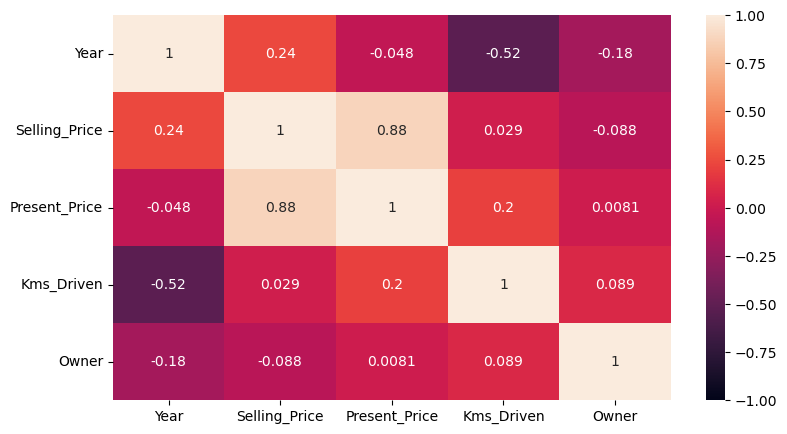

In [366]:
sns.heatmap(df.corr(), annot=True, vmin=-1)

In [367]:
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


In [368]:
df["vehicle_age"] = 2022 - df["Year"]

In [369]:
df.shape

(301, 10)

In [370]:
df["Car_Name"].value_counts()

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
ertiga                        6
eon                           6
sx4                           6
alto k10                      5
i10                           5
swift                         5
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
ritz                          4
wagon r                       4
etios liva                    4
dzire                         4
xcent                         3
etios cross                   3
Royal Enfield Thunder 500     3
TVS Apache RTR 160            3
Yamaha FZ S V 2.0             3
creta                         3
Honda CB Hornet 160R          3
etios g 

In [371]:
df.drop(columns=["Car_Name", "Year"], inplace=True)

In [372]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


<AxesSubplot:xlabel='Selling_Price', ylabel='Count'>

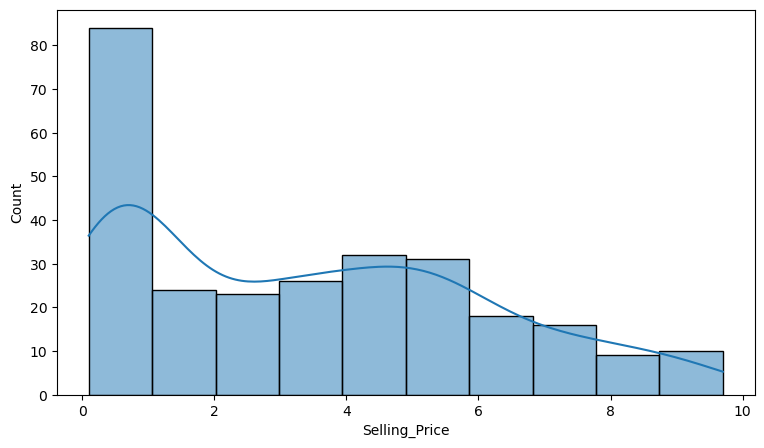

In [379]:
sns.histplot(df["Selling_Price"], kde=True)

<AxesSubplot:xlabel='Selling_Price'>

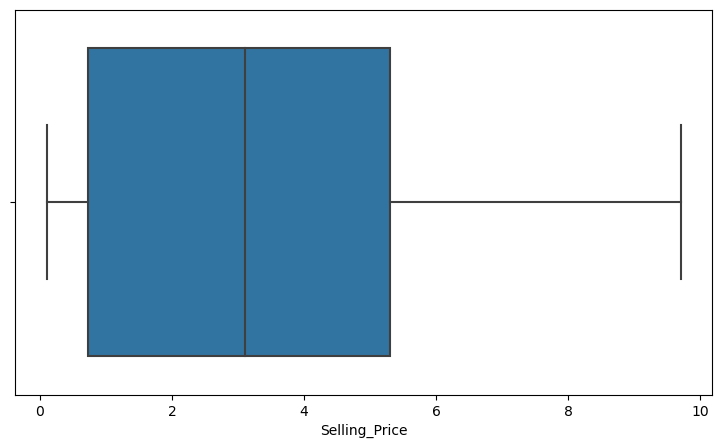

In [378]:
sns.boxplot(df["Selling_Price"])

In [375]:
df[df["Selling_Price"] > 10 ]

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
50,14.90,30.61,104707,Diesel,Dealer,Automatic,0,10
51,23.00,30.61,40000,Diesel,Dealer,Automatic,0,7
52,18.00,19.77,15000,Diesel,Dealer,Automatic,0,5
53,16.00,30.61,135000,Diesel,Individual,Automatic,0,9
59,19.99,35.96,41000,Diesel,Dealer,Automatic,0,8
62,18.75,35.96,78000,Diesel,Dealer,Automatic,0,8
63,23.50,35.96,47000,Diesel,Dealer,Automatic,0,7
64,33.00,36.23,6000,Diesel,Dealer,Automatic,0,5
66,19.75,23.15,11000,Petrol,Dealer,Automatic,0,5
69,14.25,20.91,12000,Petrol,Dealer,Manual,0,6


In [376]:
df.drop(index = df[df["Selling_Price"] > 10 ].index, inplace=True)

In [377]:
df.shape

(273, 8)

## Train test split

In [380]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [381]:
X = df.drop(columns="Selling_Price")
y = df["Selling_Price"]

In [382]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling with Pipeline for Adaboost Regressor

In [383]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [384]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [385]:
cat = X.select_dtypes("object").columns
cat

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [386]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
column_trans = make_column_transformer((ord_enc, cat), remainder="passthrough")

In [387]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostRegressor

operations = [("OrdinalEncoder", column_trans), ("Ada_model", AdaBoostRegressor(random_state=42))]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('Ada_model', AdaBoostRegressor(random_state=42))])

In [388]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.965169,0.912128
mae,0.372586,0.562579
mse,0.253582,0.586546
rmse,0.503569,0.765863


### Cross Validation

In [389]:
from sklearn.model_selection import cross_validate, cross_val_score

In [390]:
operations = [("OrdinalEncoder", column_trans), ("Ada_model", AdaBoostRegressor(random_state=42))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, 
                        scoring=["r2", "neg_mean_absolute_error", "neg_mean_squared_error", "neg_root_mean_squared_error"],
                        cv = 10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.907624
test_neg_mean_absolute_error       -0.503394
test_neg_mean_squared_error        -0.599629
test_neg_root_mean_squared_error   -0.740421
dtype: float64

## Gridsearch for Adaboosting

In [391]:
from sklearn.model_selection import GridSearchCV

In [392]:
param_grid = {
    "Ada_model__n_estimators" : [50, 100, 200, 300, 500, 600, 700, 750, 800, 850, 900],
    "Ada_model__learning_rate" : [0.1, 0.5, 0.8, 1],
    "Ada_model__loss" : ["linear", "square", "exponential"]
}

# model_loss ile her bir boosting sonrası modellerin ağırlıklarının neye göre belirleneceğini yazıyoruz.

In [393]:
operations = [("OrdinalEncoder", column_trans), ("Ada_model", AdaBoostRegressor(random_state=101))]

model = Pipeline(steps=operations)

grid_model = GridSearchCV(estimator=model, 
                          param_grid=param_grid, 
                          scoring="neg_root_mean_squared_error", 
                          cv = 10, 
                          n_jobs=-1)

In [394]:
%%time
grid_model.fit(X_train, y_train)

CPU times: total: 3.11 s
Wall time: 2min


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                                       ('Ada_model',
                                        AdaBoostRegressor(random_state=101))]),
             n_jobs=-1,
             param_grid={'Ada_model__learning_rate': [0.1, 0.5, 0.8, 1],
                         'Ada_model__loss': ['linear', 'square', 'exponential'],
                         'Ada_model__n_estimators': [50, 100, 200, 300, 500,
                                                     600, 700, 750, 800, 850,
                                                     900]},
             scoring='neg_root_mean_squared_error')

In [395]:
grid_model.best_score_

-0.7277741849154584

In [396]:
grid_model.best_params_

{'Ada_model__learning_rate': 0.5,
 'Ada_model__loss': 'exponential',
 'Ada_model__n_estimators': 100}

In [397]:
train_val(grid_model, X_train, y_train, X_test, y_test)
# Skore'larda bir gelişme olmadı.

,train,test
R2,0.962262,0.908951
mae,0.404376,0.551404
mse,0.274741,0.607755
rmse,0.524157,0.779586


## Feature importance

In [398]:
grid_model.best_params_

{'Ada_model__learning_rate': 0.5,
 'Ada_model__loss': 'exponential',
 'Ada_model__n_estimators': 100}

In [399]:
operations = [("OrdinalEncoder", column_trans), ("Ada_model", AdaBoostRegressor(loss="square",
                                                                                learning_rate=1,
                                                                                n_estimators=700,
                                                                                random_state=42))]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('Ada_model',
                 AdaBoostRegressor(learning_rate=1, loss='square',
                                   n_estimators=700, random_state=42))])

In [400]:
pipe_model["Ada_model"].feature_importances_

array([0.07965467, 0.09786179, 0.00645268, 0.45459391, 0.11042649,
       0.00405972, 0.24695073])

In [401]:
features = list(X.select_dtypes("object").columns) + list(X.select_dtypes("number").columns) 
features
# Burada Ordianl Encoder işlemi sonrası modelimizin feature sıralaması değişmişti. Onu düzenledik.

['Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Present_Price',
 'Kms_Driven',
 'Owner',
 'vehicle_age']

In [402]:
ada_FIM = pd.DataFrame(data=pipe_model["Ada_model"].feature_importances_, columns=["ada_importance"], index= features)
ada_FIM.sort_values(by="ada_importance", ascending=False, inplace=True)
ada_FIM

,ada_importance
Present_Price,0.454594
vehicle_age,0.246951
Kms_Driven,0.110426
Seller_Type,0.097862
Fuel_Type,0.079655
Transmission,0.006453
Owner,0.004060


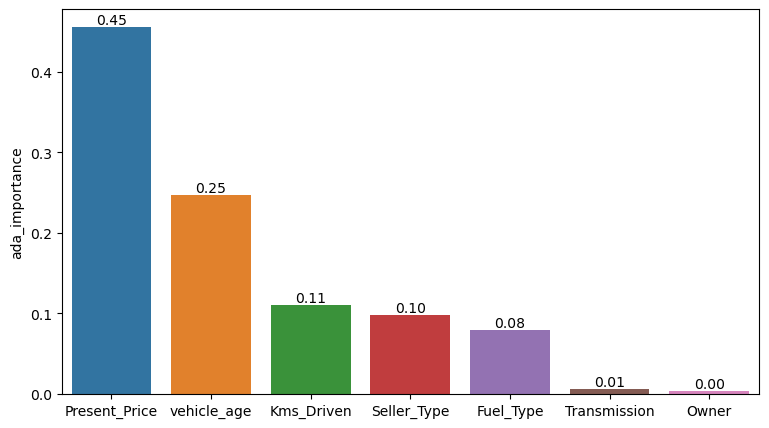

In [403]:
ax = sns.barplot(data=ada_FIM, x=ada_FIM.index, y="ada_importance")
for i in ax.containers:
    ax.bar_label(i, fmt="%.2f")

### Drop Most Important Feature

In [404]:
df2 = df.drop(columns="Present_Price")

In [405]:
X2 = df2.drop(columns="Selling_Price")
y2 = df2["Selling_Price"]

In [406]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [407]:
cat = X2.select_dtypes("object").columns
cat

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [408]:
ord_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
column_trans = make_column_transformer((ord_enc, cat), remainder="passthrough")

In [409]:
operations = [("OrdinalEncoder", column_trans), ("Ada_model", AdaBoostRegressor(random_state=42))]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train2, y_train2)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('Ada_model', AdaBoostRegressor(random_state=42))])

In [410]:
train_val(pipe_model, X_train2, y_train2, X_test2, y_test2)

,train,test
R2,0.794585,0.678857
mae,0.887297,1.108503
mse,1.495482,2.143643
rmse,1.222899,1.464118


In [411]:
operations = [("OrdinalEncoder", column_trans), ("Ada_model", AdaBoostRegressor(random_state=42))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train2, y_train2, 
                        scoring=["r2", "neg_mean_absolute_error", "neg_mean_squared_error", "neg_root_mean_squared_error"],
                        cv = 10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.687888
test_neg_mean_absolute_error       -1.034790
test_neg_mean_squared_error        -2.171255
test_neg_root_mean_squared_error   -1.458457
dtype: float64

In [412]:
operations = [("OrdinalEncoder", column_trans), ("Ada_model", AdaBoostRegressor(random_state=101))]

model = Pipeline(steps=operations)

grid_model = GridSearchCV(estimator=model, 
                          param_grid=param_grid, 
                          scoring="neg_root_mean_squared_error", 
                          cv = 10, 
                          n_jobs=-1)

In [413]:
grid_model.fit(X_train2, y_train2)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                                       ('Ada_model',
                                        AdaBoostRegressor(random_state=101))]),
             n_jobs=-1,
             param_grid={'Ada_model__learning_rate': [0.1, 0.5, 0.8, 1],
                         'Ada_model__loss': ['linear', 'square', 'exponential'],
                         'Ada_model__n_estimators': [50, 100, 200, 300, 500,
                                                     600, 700, 750, 800, 850,
                                                     900]},
             scoring='neg_root_mean_squared_error')

In [414]:
grid_model.best_params_

{'Ada_model__learning_rate': 0.1,
 'Ada_model__loss': 'square',
 'Ada_model__n_estimators': 50}

In [415]:
train_val(grid_model, X_train2, y_train2, X_test2, y_test2)

,train,test
R2,0.784866,0.685693
mae,0.893608,1.073940
mse,1.566238,2.098006
rmse,1.251494,1.448450


In [416]:
features = list(X2.select_dtypes("object").columns) + list(X2.select_dtypes("number").columns) 
features

['Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Kms_Driven',
 'Owner',
 'vehicle_age']

In [417]:
FIM = pd.DataFrame(data=pipe_model["Ada_model"].feature_importances_, columns=["ada_importance"], index= features)
FIM.sort_values(by="ada_importance", ascending=False, inplace=True)
FIM

,ada_importance
Seller_Type,0.536832
vehicle_age,0.218486
Fuel_Type,0.114535
Kms_Driven,0.107434
Owner,0.022529
Transmission,0.000185


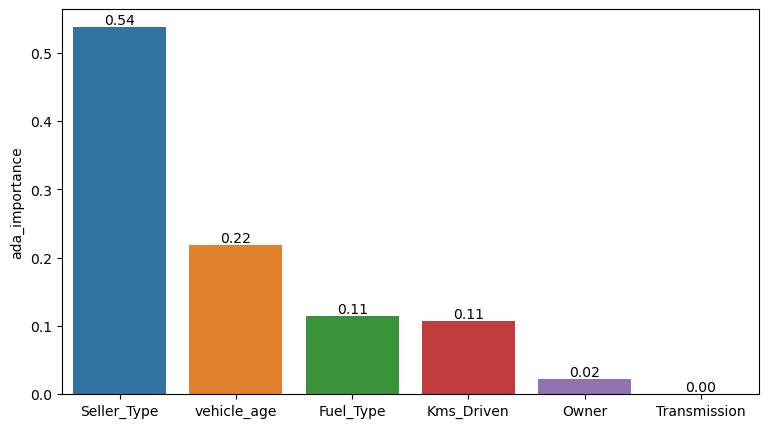

In [418]:
ax = sns.barplot(data=FIM, x=FIM.index, y="ada_importance")
for i in ax.containers:
    ax.bar_label(i, fmt="%.2f")

## Modeling with Pipeline for Gradient Boosting Regressor

In [419]:
from sklearn.ensemble import GradientBoostingRegressor

In [420]:
operations = [("OrdinalEncoder", column_trans), ("GB_model", GradientBoostingRegressor(random_state=42))]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('GB_model', GradientBoostingRegressor(random_state=42))])

In [421]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.992689,0.949737
mae,0.161097,0.407594
mse,0.053229,0.335505
rmse,0.230713,0.579228


In [422]:
operations = [("OrdinalEncoder", column_trans), ("GB_model", GradientBoostingRegressor(random_state=101))]

model = Pipeline(steps=operations)
scores = cross_validate(model, X_train, y_train, 
                        scoring=['r2','neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
                        cv =10)
pd.DataFrame(scores)
pd.DataFrame(scores).mean()[2:]

test_r2                             0.936006
test_neg_mean_absolute_error       -0.395431
test_neg_mean_squared_error        -0.413922
test_neg_root_mean_squared_error   -0.612970
dtype: float64

## Gridsearch for Gradientboosting

In [427]:
param_grid = {"GB_model__n_estimators":[64, 128, 150, 175], 
              "GB_model__subsample":[0.5, 0.7, 0.8, 0.9, 1], 
              "GB_model__max_features" : [3, 5, 6, 7],
              "GB_model__learning_rate": [0.01, 0.05, 0.1, 0.2], 
              'GB_model__max_depth':[1,2,3,4,5,6]}

In [428]:
operations = [("OrdinalEncoder", column_trans), ("GB_model", GradientBoostingRegressor(random_state=101))]

model = Pipeline(steps=operations)

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=5,
                          n_jobs = -1)

In [429]:
%%time
grid_model.fit(X_train, y_train)

CPU times: total: 12 s
Wall time: 1min 15s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                                       ('GB_model',
                                        GradientBoostingRegressor(random_state=101))]),
             n_jobs=-1,
             param_grid={'GB_model__learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'GB_model__max_depth': [1, 2, 3, 4, 5, 6],
                         'GB_model__max_features': [3, 5, 6, 7],
                         'GB_model__n_estimators': [64, 128, 150, 175],
                         'GB_model__subsample': [0.5, 0.7, 0.8, 0.9, 1]},
             scoring='neg_root_mean_squared_error')

In [430]:
grid_model.best_params_

{'GB_model__learning_rate': 0.1,
 'GB_model__max_depth': 4,
 'GB_model__max_features': 3,
 'GB_model__n_estimators': 128,
 'GB_model__subsample': 0.7}

In [431]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.997809,0.946477
mae,0.093119,0.422605
mse,0.015950,0.357265
rmse,0.126292,0.597716


## Feature importance

In [432]:
grid_model.best_params_

{'GB_model__learning_rate': 0.1,
 'GB_model__max_depth': 4,
 'GB_model__max_features': 3,
 'GB_model__n_estimators': 128,
 'GB_model__subsample': 0.7}

In [433]:
operations = [("OrdinalEncoder", column_trans), ("GB_model", GradientBoostingRegressor(max_depth=2, max_features=6,
                                           n_estimators=64, random_state=42, subsample=0.9))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('GB_model',
                 GradientBoostingRegressor(max_depth=2, max_features=6,
                                           n_estimators=64, random_state=42,
                                           subsample=0.9))])

In [434]:
features = list(X.select_dtypes("object").columns) + list(X.select_dtypes("number").columns) 
features

['Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Present_Price',
 'Kms_Driven',
 'Owner',
 'vehicle_age']

In [435]:
gb_FIM = pd.DataFrame(data=pipe_model["GB_model"].feature_importances_,columns=['grad_Importance'], index=features)
gb_FIM.sort_values('grad_Importance', ascending=False, inplace=True)
gb_FIM

,grad_Importance
Present_Price,0.746449
Seller_Type,0.118583
vehicle_age,0.108664
Kms_Driven,0.022587
Fuel_Type,0.003046
Owner,0.000671
Transmission,0.000000


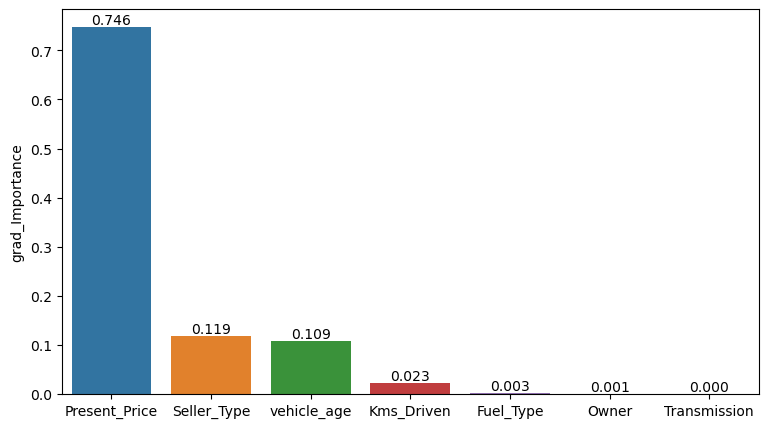

In [436]:
ax = sns.barplot(data=gb_FIM, x=gb_FIM.index, y='grad_Importance')
ax.bar_label(ax.containers[0],fmt="%.3f");

## Modeling with Pipeline for XG Boost Regressor

In [437]:
from xgboost import XGBRegressor

In [438]:
operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBRegressor(random_state=101, objective="reg:squarederror"))]
# Objective: Specify the learning task and the corresponding learning objective or a custom objective function to be used

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('XGB_model',
                 XGBRegressor(objective='reg:squarederror', random_state=101))])

In [439]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.989849,0.947254
mae,0.185881,0.419251
mse,0.073902,0.352083
rmse,0.271849,0.593365


In [440]:
operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBRegressor(random_state=101, objective="reg:squarederror"))]
model = Pipeline(steps=operations)
scores = cross_validate(model, X_train, y_train, 
                        scoring=['r2','neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
                        cv =10)

pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.939212
test_neg_mean_absolute_error       -0.392782
test_neg_mean_squared_error        -0.398562
test_neg_root_mean_squared_error   -0.608757
dtype: float64

## Gridsearch for XGBoost

In [441]:
param_grid = {"XGB_model__n_estimators":[30, 50, 70, 80, 90, 100,],
              "XGB_model__max_depth":[1, 2, 3, 4, 5], 
              "XGB_model__learning_rate": [0.01, 0.05, 0.1],
              "XGB_model__subsample":[0.5, 1], 
              "XGB_model__colsample_bytree":[0.5, 0.8, 0.9, 1]}

In [442]:
operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBRegressor(random_state=101, 
                                                                           objective="reg:squarederror"))]
model = Pipeline(steps=operations)

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [443]:
%%time
grid_model.fit(X_train, y_train)

CPU times: total: 5.94 s
Wall time: 20 s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBRegressor(objective='reg:squarederror',
                                                     random_state=101))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.5, 0.8, 0.9, 1],
                         'XGB_model__learning_rate': [0.01, 0.05, 0.1],
                         'XGB_model__max_depth': [1, 2, 3, 4, 5],
                         'XGB_model__n_estimators': [30, 50, 70, 80, 90, 100],
                         'XGB_model__subsample': [0.5, 1]},
             scoring='neg_root_mean_squared_error')

In [444]:
grid_model.best_params_

{'XGB_model__colsample_bytree': 0.9,
 'XGB_model__learning_rate': 0.1,
 'XGB_model__max_depth': 3,
 'XGB_model__n_estimators': 100,
 'XGB_model__subsample': 0.5}

In [445]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.986716,0.957790
mae,0.216507,0.408166
mse,0.096708,0.281755
rmse,0.310980,0.530806


## Feature importance

In [446]:
operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBRegressor(learning_rate=0.1, max_depth=2,
                              n_estimators=70, objective='reg:squarederror', random_state=101,subsample=1))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('XGB_model',
                 XGBRegressor(max_depth=2, n_estimators=70,
                              objective='reg:squarederror',
                              random_state=101))])

In [447]:
pipe_model["XGB_model"].feature_importances_

array([0.02202038, 0.09163724, 0.        , 0.6773087 , 0.07439227,
       0.        , 0.13464148], dtype=float32)

In [448]:
xgb_FIM = pd.DataFrame(data=pipe_model["XGB_model"].feature_importances_, columns=['xgb_Importance'], index=features)
xgb_FIM.sort_values('xgb_Importance', ascending=False, inplace=True)
xgb_FIM

,xgb_Importance
Present_Price,0.677309
vehicle_age,0.134641
Seller_Type,0.091637
Kms_Driven,0.074392
Fuel_Type,0.022020
Transmission,0.000000
Owner,0.000000


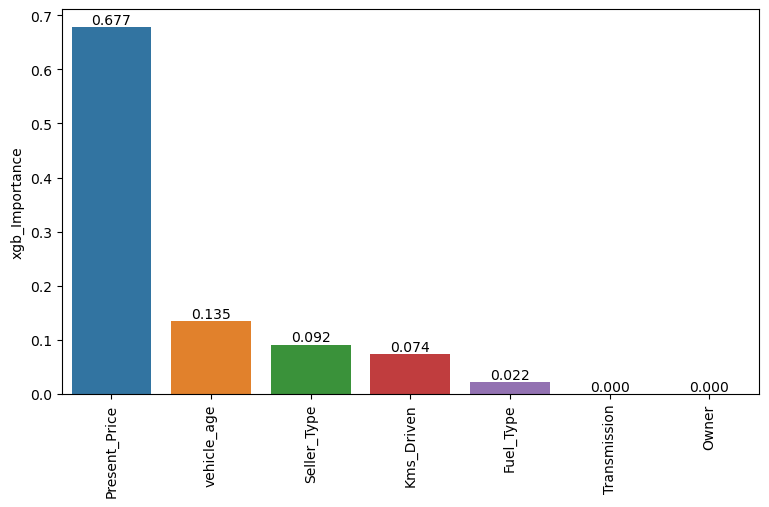

In [449]:
ax = sns.barplot(data=xgb_FIM, x=xgb_FIM.index, y='xgb_Importance')
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation=90);

## Feature importance comparison

In [451]:
pd.concat([xgb_FIM, ada_FIM, gb_FIM], axis=1)

,xgb_Importance,ada_importance,grad_Importance
Present_Price,0.677309,0.454594,0.746449
vehicle_age,0.134641,0.246951,0.108664
Seller_Type,0.091637,0.097862,0.118583
Kms_Driven,0.074392,0.110426,0.022587
Fuel_Type,0.022020,0.079655,0.003046
Transmission,0.000000,0.006453,0.000000
Owner,0.000000,0.004060,0.000671


## Feature Selection

In [453]:
df_new = df[["Present_Price", "vehicle_age", "Seller_Type"]]
df_new.head()

,Present_Price,vehicle_age,Seller_Type
0,5.59,8,Dealer
1,9.54,9,Dealer
2,9.85,5,Dealer
3,4.15,11,Dealer
4,6.87,8,Dealer


In [454]:
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size=0.2, random_state=101)

In [455]:
cat2 = ["Seller_Type"]

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat2), remainder='passthrough')


operations = [("OrdinalEncoder", column_trans), ("XGB_model",XGBRegressor(colsample_bytree=0.9,
                                                                          learning_rate=0.1, 
                                                                          max_depth=3,
                                                                          n_estimators=100,
                                                                          objective='reg:squarederror', 
                                                                          random_state=101,subsample=0.5))]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train,y_train)
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.971662,0.969292
mae,0.317812,0.351789
mse,0.195478,0.251417
rmse,0.442128,0.501415


In [456]:
operations = [("OrdinalEncoder", column_trans), ("XGB_model",XGBRegressor(colsample_bytree=0.9,
                                                                          learning_rate=0.1, 
                                                                          max_depth=3,
                                                                          n_estimators=100,
                                                                          objective='reg:squarederror', 
                                                                          random_state=101,subsample=0.5))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.930174
test_neg_mean_absolute_error       -0.452962
test_neg_mean_squared_error        -0.448549
test_neg_root_mean_squared_error   -0.640979
dtype: float64

## Final Model

In [457]:
df_new.head()

,Present_Price,vehicle_age,Seller_Type
0,5.59,8,Dealer
1,9.54,9,Dealer
2,9.85,5,Dealer
3,4.15,11,Dealer
4,6.87,8,Dealer


In [459]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer

cat2 = ["Seller_Type"]

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat2), remainder='passthrough')

operations = [("OrdinalEncoder", column_trans), ("XGB_model",XGBRegressor(colsample_bytree=0.9,
                                                                          learning_rate=0.1, 
                                                                          max_depth=3,
                                                                          n_estimators=100,
                                                                          objective='reg:squarederror', 
                                                                          random_state=101,subsample=0.5))]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(df_new, y)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Seller_Type'])])),
                ('XGB_model',
                 XGBRegressor(colsample_bytree=0.9,
                              objective='reg:squarederror', random_state=101,
                              subsample=0.5))])

## Prediction

In [460]:
samples = {"Present_Price": [7, 9.5],
           "Kms_Driven": [25000, 44000],
           "Fuel_Type":["Petrol", "Diesel"],
           'Seller_Type':['Dealer', 'Individual'],
           'Transmission': ['Manual', 'Automatic'],
           "Owner":[0,1],
           "vehicle_age":[1, 9]}

In [461]:
df_samples = pd.DataFrame(samples)
df_samples

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,7.0,25000,Petrol,Dealer,Manual,0,1
1,9.5,44000,Diesel,Individual,Automatic,1,9


In [462]:
pipe_model.predict(df_samples)

array([5.7622023, 4.031101 ], dtype=float32)

In [463]:
# Burada modeli 3 feature üzerinden eğittik ama sample verirken 7 feature üzerinden verdik.
# Kullanıcının 7 feature'luk veri girmesi modelimizi etkilemez.
# Model 3 feature üzerinden tahminini yapar çünkü make_column_transfer yaptık.
# Böylelikle model bilmediğine pass_through yapacak